In [ ]:
### Raw fastq files were downloaded from: https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-4415/


## we used cell lines derived from GEMM model of PDAC (KRAS_Trp53fl/+ and KRAS_Trp53fl/+_Trp63fl/fl)for our analysis

## Kallisto was used for sequence alignment and index (prebuilt mice index) was downloaded from kallisto website

### Kallisto code used for the pseudoalignment (no bootstrap) is as below

#1# files=`ls *fastq`
#2# for i in $files; do nam=`basename $i "fastq"`; kallisto quant -i ~/mus_musculus/transcriptome.idx $i --single -l 150 -s 20 -o ./${nam};done


In [45]:
setwd("/media/rchirravurivenkata/My Passport/new/")

In [46]:
files=list.files(pattern = ".h5", recursive = T, full.names = T)

In [47]:
files =files[-1]
sample= gsub("_.+$", "", files)


In [48]:
sample

[1] "./ERR1248125" "./ERR1248126" "./ERR1248127" "./ERR1248128" "./ERR1248129"
[6] "./ERR1248130"

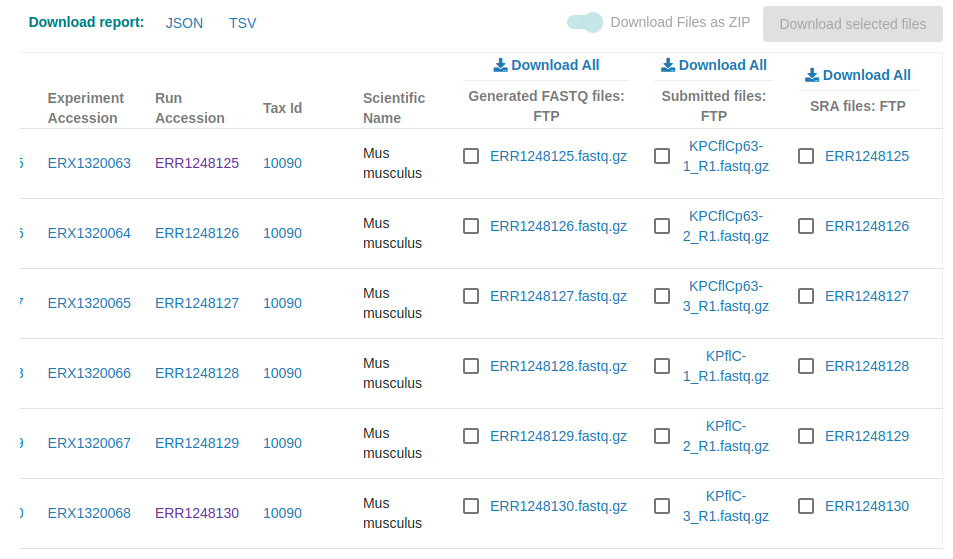

In [49]:
sample

[1] "./ERR1248125" "./ERR1248126" "./ERR1248127" "./ERR1248128" "./ERR1248129"
[6] "./ERR1248130"

In [50]:
names= c( rep("KRAS Trp53fl/+ Trp63fl/fl", 3), rep("KRAS Trp53fl/+", 3))

In [51]:
s2c = data.frame(sample = sample, condition = names, path = files)

In [52]:
s2c = unique(s2c)
s2c

,sample,condition,path
,<chr>,<chr>,<chr>
1,./ERR1248125,KRAS Trp53fl/+ Trp63fl/fl,./ERR1248125_1./abundance.h5
2,./ERR1248126,KRAS Trp53fl/+ Trp63fl/fl,./ERR1248126_1./abundance.h5
3,./ERR1248127,KRAS Trp53fl/+ Trp63fl/fl,./ERR1248127_1./abundance.h5
4,./ERR1248128,KRAS Trp53fl/+,./ERR1248128_1./abundance.h5
5,./ERR1248129,KRAS Trp53fl/+,./ERR1248129_1./abundance.h5
6,./ERR1248130,KRAS Trp53fl/+,./ERR1248130_1./abundance.h5


In [53]:
library(biomaRt)
library(sleuth)

In [55]:
a =read.csv("ERR1248125_1./abundance.tsv", header= T, stringsAsFactors = F, row.names = 1, sep = "\t")

In [56]:
tx2gene <- read.csv("~/mus_musculus/transcripts_to_genes.txt", stringsAsFactors = F, sep = "\t", header= F)

colnames(tx2gene)[c(1,2,3)] = c("TXNAME", "", "GENEID")

In [57]:
library(DESeq2)

library(tximport)
txi.kallisto <- tximport(files, type = "kallisto", tx2gene = tx2gene)


1 
2 
3 
4 
5 
6 


transcripts missing from tx2gene: 1673

summarizing abundance

summarizing counts

summarizing length



In [58]:
dds <- DESeqDataSetFromTximport(txi.kallisto, s2c, ~condition)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using counts and average transcript lengths from tximport



In [59]:
counts = fpkm(dds)

In [60]:
des = counts
df = data.frame(gene = tx2gene[,3], names= tx2gene[,2])

In [61]:
df= unique(df)
rownames(df)= df[,2]

In [62]:
names = df[rownames(des), 1]

In [63]:
rownames(des) =names

In [64]:
colnames(des)= s2c[,2]

In [107]:
genes = c("Kras", "Sox9", "Twist1", "Vegfc", "Nrp2", "Jun")
genes2 = c( "Scara3", "Trp53")

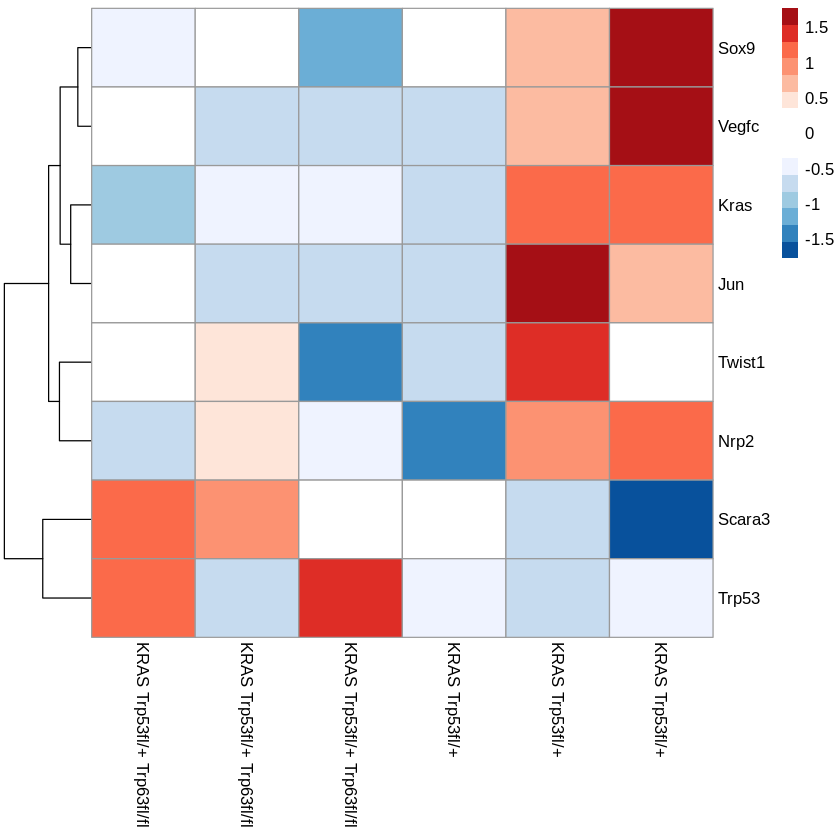

In [96]:
library(pheatmap)
library(RColorBrewer)
pheatmap(log2(des[genes, ]+1), scale = "row", cluster_cols =F, col = c(rev(brewer.pal(6, "Blues")), "white", "white", "white", brewer.pal(6, "Reds")))

In [108]:
mini = des[genes, ]

mini2 = des[genes2, ]

In [110]:
c = c()
for(i in 1:nrow(mini)){
    c = append(c, t.test(mini[i, 1:3], mini[i, 4:6], alternative = "less")$p.value)}

c1 = c()
for(i in 1:nrow(mini2)){
    c1 = append(c1, t.test(mini2[i, 1:3], mini2[i, 4:6], alternative = "greater")$p.value)}
c
c1
genes


[1] 0.09761892 0.13993973 0.20302168 0.15195086 0.15035049 0.13990364

[1] 0.04034957 0.09623523

[1] "Kras"   "Sox9"   "Twist1" "Vegfc"  "Nrp2"   "Jun"

In [112]:
m1 = apply(mini[, 1:3], 1, mean)
m2 = apply(mini[, 4:6], 1, mean)

m11 = apply(mini2[, 1:3], 1, mean)
m22 = apply(mini2[, 4:6], 1, mean)

lfc = log2((m2/m1))
lfc2 = log2((m22/m11))


df = data.frame(gene = c(genes, genes2), log2fc = c(lfc, lfc2), pvalue = c(c,c1))


In [122]:
head(df)

,gene,log2fc,pvalue
,<chr>,<dbl>,<dbl>
Kras,Kras,2.635743,0.09761892
Sox9,Sox9,2.670753,0.13993973
Twist1,Twist1,2.165993,0.20302168
Vegfc,Vegfc,2.778461,0.15195086
Nrp2,Nrp2,1.630720,0.15035049
Jun,Jun,2.217597,0.13990364


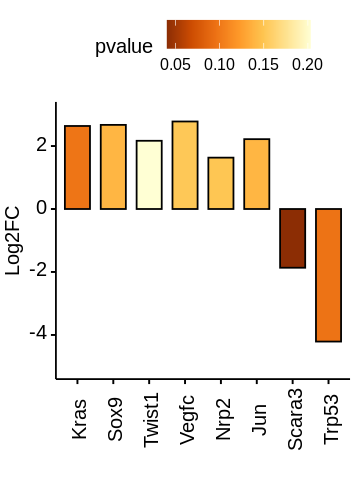

In [152]:
library(ggpubr)

options(repr.plot.width=3, repr.plot.height=4)


ggbarplot(df, x = "gene", y = "log2fc", fill = "pvalue", xlab = "", ylab = "Log2FC", ylim = c(-5, 3))+ scale_fill_distiller(palette = "YlOrBr") +
  theme(axis.text.x = element_text(angle = 90))